Quelle: https://data.insideairbnb.com/united-states/ny/new-york-city/2024-09-04/data/listings.csv.gz

Erklärung zu den Spalten: https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz/edit?gid=1967362979#gid=1967362979

In [1]:
import pandas as pd


df = pd.read_csv("../data/raw/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,739333866230665371,https://www.airbnb.com/rooms/739333866230665371,20240904164109,2024-09-04,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,20240904164109,2024-09-04,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.83,4.67,4.67,NaN,t,2,0,2,0,0.21
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,2024-09-04,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,838141198693830649,https://www.airbnb.com/rooms/838141198693830649,20240904164109,2024-09-04,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,1082660771919357919,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,2024-09-04,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN


In [2]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
cols = ["latitude", "longitude", "neighbourhood_group_cleansed",
        "property_type", "room_type", "price", "minimum_nights", "maximum_nights"]
reduced_df = df[cols]
reduced_df.head()

,latitude,longitude,neighbourhood_group_cleansed,property_type,room_type,price,minimum_nights,maximum_nights
0,40.614310,-74.034440,Brooklyn,Private room in rental unit,Private room,$89.00,31,33
1,40.639520,-74.014840,Brooklyn,Private room in rental unit,Private room,$45.00,30,100
2,40.850030,-73.922810,Bronx,Private room in rental unit,Private room,$107.00,30,1125
3,40.798718,-73.940093,Manhattan,Entire rental unit,Entire home/apt,$140.00,120,365
4,40.668012,-73.985226,Brooklyn,Entire home,Entire home/apt,$340.00,30,62


In [5]:
id(df) == id (reduced_df) # Die DFs sind unabhängig

False

In [6]:
def clean_columns(self, inplace=False):
    cleaned_columns = self.columns.str.replace(" ", "_").str.lower()
    new_df = self.copy()
    new_df.columns = cleaned_columns
    return df

pd.DataFrame.clean_columns = clean_columns

In [7]:
reduced_df.shape

(37541, 8)

In [8]:
reduced_df.isna().sum().sort_values(ascending=False)

price                           14751
latitude                            0
longitude                           0
neighbourhood_group_cleansed        0
property_type                       0
room_type                           0
minimum_nights                      0
maximum_nights                      0
dtype: int64

In [9]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      37541 non-null  float64
 1   longitude                     37541 non-null  float64
 2   neighbourhood_group_cleansed  37541 non-null  object 
 3   property_type                 37541 non-null  object 
 4   room_type                     37541 non-null  object 
 5   price                         22790 non-null  object 
 6   minimum_nights                37541 non-null  int64  
 7   maximum_nights                37541 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ MB


In [10]:
reduced_df["price"]

0         $89.00
1         $45.00
2        $107.00
3        $140.00
4        $340.00
          ...   
37536     $65.00
37537    $367.00
37538     $89.00
37539    $185.00
37540        NaN
Name: price, Length: 37541, dtype: object

In [11]:
float("12.4")

12.4

In [12]:
# the flex way
def clear_numeric(self, col, type=int, sep="."):
    df = self.copy()
    # df = df.drop_duplicates()
    df = df.dropna(subset=[col])
    all_non_numeric = set(
        char for value in df[col].astype(str)
        for char in value if (not char.isnumeric() and char != sep)
    )
    for non_numeric in all_non_numeric:
        df[col] = df[col].str.replace(non_numeric, "")
    df[col] = df[col].astype(type)
    
    return df

pd.DataFrame.clear_numeric = clear_numeric

In [13]:
reduced_df["price"]

0         $89.00
1         $45.00
2        $107.00
3        $140.00
4        $340.00
          ...   
37536     $65.00
37537    $367.00
37538     $89.00
37539    $185.00
37540        NaN
Name: price, Length: 37541, dtype: object

In [14]:
# reduced_df["price"].str.strip().str.replace("$", "").str.replace(",","").astype(float) # the ugly way (but simple)
reduced_df["price"] = reduced_df["price"].str.replace(r"[^\d.]", "", regex=True).astype(float)  # the fast way


/var/folders/t5/m580657s5rxblthmnv5y6vfm0000gn/T/ipykernel_80064/248119732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["price"] = reduced_df["price"].str.replace(r"[^\d.]", "", regex=True).astype(float)  # the fast way


In [15]:
reduced_df.clear_numeric(col="price", type=float, sep=".")

,latitude,longitude,neighbourhood_group_cleansed,property_type,room_type,price,minimum_nights,maximum_nights
0,40.614310,-74.034440,Brooklyn,Private room in rental unit,Private room,89.0,31,33
1,40.639520,-74.014840,Brooklyn,Private room in rental unit,Private room,45.0,30,100
2,40.850030,-73.922810,Bronx,Private room in rental unit,Private room,107.0,30,1125
3,40.798718,-73.940093,Manhattan,Entire rental unit,Entire home/apt,140.0,120,365
4,40.668012,-73.985226,Brooklyn,Entire home,Entire home/apt,340.0,30,62
...,...,...,...,...,...,...,...,...
37535,40.817370,-73.819710,Bronx,Entire rental unit,Entire home/apt,110.0,30,1125
37536,40.676080,-73.796300,Queens,Private room in home,Private room,65.0,30,31
37537,40.766890,-73.871270,Queens,Entire rental unit,Entire home/apt,367.0,2,365
37538,40.762120,-73.873150,Queens,Private room in home,Private room,89.0,1,730


In [16]:
reduced_df.shape

(37541, 8)

## Frage: 
1. Was kostet eine Airbnb in NY durchschnittlich?
2. Wie können wir Duplikate erkennen und entfernen

In [17]:
reduced_df["price"].mean()

np.float64(232.8917946467749)

In [18]:
# Der Datensatz hat einige exakte Duplikate
print(df.shape)
print(df.drop_duplicates().shape)

(37541, 75)
(37541, 75)


In [19]:
reduced_df["price"]

0         89.0
1         45.0
2        107.0
3        140.0
4        340.0
         ...  
37536     65.0
37537    367.0
37538     89.0
37539    185.0
37540      NaN
Name: price, Length: 37541, dtype: float64

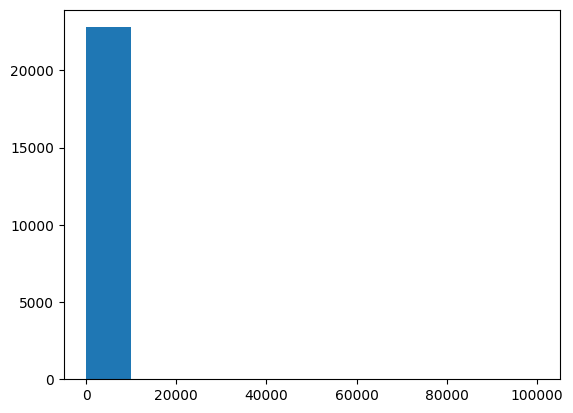

In [20]:
import matplotlib.pyplot as plt

plt.hist(reduced_df["price"], bins=10)
plt.show()

<Axes: ylabel='price'>

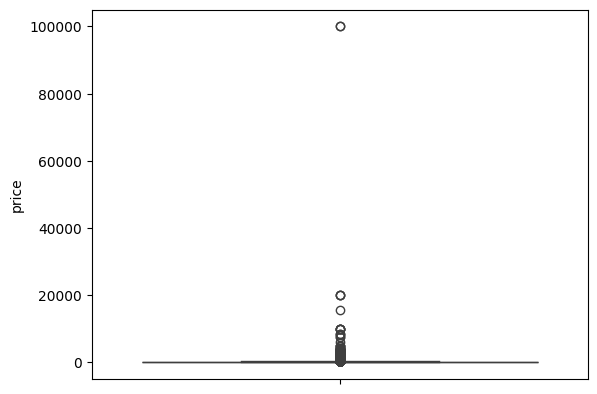

In [21]:
import seaborn as sns

sns.boxplot(data=reduced_df, y="price")

In [22]:
index_of_outliers = reduced_df[reduced_df["price"] > 2000].index
index_of_outliers

Index([ 1136,  1171,  1431,  1672,  1849,  1952,  2210,  2237,  2380,  2445,
        2554,  3140,  4083,  4336,  4583,  5617,  5702,  6380,  8133,  8406,
        8712,  8790,  9241,  9383,  9389,  9471,  9670,  9699, 10177, 12369,
       13239, 13507, 13779, 14223, 14368, 14434, 14941, 14989, 15254, 16219,
       17065, 17127, 17174, 17398, 17437, 17501, 17536, 18805, 18973, 21768,
       22803, 23242, 24384, 25822, 26248, 26402, 26880, 27676, 27890, 27909,
       28291, 28302, 28569, 28587, 29065, 29205, 29232, 29412, 30001, 30014,
       31218, 31415, 31539, 31820, 32953, 33207, 33247, 33867, 34204, 34320,
       34514, 34686, 34775, 35015, 35098, 35239, 37289],
      dtype='int64')

In [23]:
df.loc[index_of_outliers, :]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1136,52172551,https://www.airbnb.com/rooms/52172551,20240904164109,2024-09-05,city scrape,Blue Moon Hotel | Luxury King with Balcony,Be transported into a place in history where q...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,411740512,...,4.80,4.8,4.60,Exempt,f,17,17,0,0,0.15
1171,912396732617862267,https://www.airbnb.com/rooms/912396732617862267,20240904164109,2024-09-04,city scrape,3 Bedroom 3 level penthouse,Enjoy a lavish experience at this centrally-lo...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,34906299,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
1431,727439577532735416,https://www.airbnb.com/rooms/727439577532735416,20240904164109,2024-09-05,city scrape,Cozy one bedroom condo in soho,"This special place is close to everything, mak...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,71981658,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1672,579063522427869170,https://www.airbnb.com/rooms/579063522427869170,20240904164109,2024-09-05,city scrape,"Prime Tribeca 5,400 SQ Foot Triplex","This is a stunning, 5,400 square foot triplex....",Tribeca is located in Manhattan and is central...,https://a0.muscache.com/pictures/08c6c7a6-d322...,370015531,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1849,1073191131218200317,https://www.airbnb.com/rooms/1073191131218200317,20240904164109,2024-09-05,city scrape,Manhattan Haven Modern Home,"Discover Manhattan Haven Modern Home, a 3-bed,...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,555554255,...,NaN,NaN,NaN,Exempt,t,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,18071399,https://www.airbnb.com/rooms/18071399,20240904164109,2024-09-04,city scrape,West Chelsea Studios - Penthouse 12,Natural light in the heart of Chelsea. Our pen...,Chelsea is the gallery district on the west si...,https://a0.muscache.com/pictures/dfa06cca-d8b1...,113534805,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
35015,1010083125968738233,https://www.airbnb.com/rooms/1010083125968738233,20240904164109,2024-09-04,city scrape,Star experience in Manhattan,BETTER THAN A HOTEL. Designed for the discerni...,Our extended stay residences incorporate tast...,https://a0.muscache.com/pictures/miso/Hosting-...,252866861,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN
35098,47703518,https://www.airbnb.com/rooms/47703518,20240904164109,2024-09-05,city scrape,New Designer-Built Home w/Private Beach,Spectacular waterfront escape built by designe...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,62954695,...,5.00,5.0,4.33,NaN,f,1,1,0,0,0.08
35239,1004416200240866150,https://www.airbnb.com/rooms/1004416200240866150,20240904164109,2024-09-04,city scrape,Real Housewives Star NY Townhome,Rent this fabulous Manhattan townhouse of seri...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,252866861,...,NaN,NaN,NaN,NaN,t,4,4,0,0,NaN


In [24]:
reduced_df["price"].notna()

0         True
1         True
2         True
3         True
4         True
         ...  
37536     True
37537     True
37538     True
37539     True
37540    False
Name: price, Length: 37541, dtype: bool

In [25]:
below_2k = reduced_df[(reduced_df["price"] < 2000) | (reduced_df["price"].isna()) ]
below_2k.shape

(37444, 8)

(array([3.800e+01, 1.681e+03, 2.283e+03, 1.999e+03, 2.163e+03, 1.793e+03,
        1.446e+03, 1.743e+03, 1.194e+03, 1.186e+03, 7.160e+02, 5.230e+02,
        6.850e+02, 4.380e+02, 5.960e+02, 3.010e+02, 3.620e+02, 4.120e+02,
        2.830e+02, 3.350e+02, 2.380e+02, 1.940e+02, 1.710e+02, 1.520e+02,
        2.050e+02, 1.110e+02, 7.900e+01, 1.120e+02, 6.300e+01, 1.210e+02,
        6.800e+01, 6.500e+01, 9.200e+01, 6.600e+01, 7.400e+01, 3.400e+01,
        2.900e+01, 4.800e+01, 3.100e+01, 6.000e+01, 1.100e+01, 2.200e+01,
        3.200e+01, 2.200e+01, 2.700e+01, 1.500e+01, 1.200e+01, 1.800e+01,
        1.400e+01, 9.500e+01, 5.000e+00, 1.800e+01, 1.000e+01, 4.000e+00,
        1.300e+01, 6.000e+00, 5.000e+00, 5.000e+00, 5.000e+00, 1.800e+01,
        3.000e+00, 6.000e+00, 3.000e+00, 8.000e+00, 8.000e+00, 6.000e+00,
        5.000e+00, 4.000e+00, 7.000e+00, 6.000e+00, 4.000e+00, 4.000e+00,
        1.000e+00, 3.000e+00, 2.000e+01, 1.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 6.000e+00, 4.000e+0

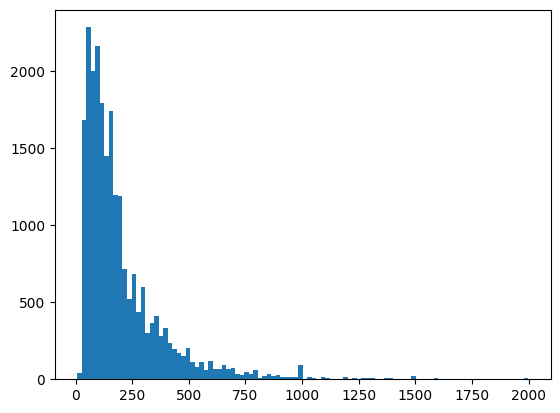

In [26]:
plt.hist(below_2k["price"], bins=100)

In [27]:
print(below_2k["price"].mean())
print(below_2k["price"].median())

207.55558982946283
145.0


In [28]:
below_2k["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

## Wie verhalten sich die Preise in Abhängigkeit zu 
- Stadtteil
- Room Type
- minimum_nights 


In [29]:
below_2k.columns

Index(['latitude', 'longitude', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [30]:
below_2k.groupby("neighbourhood_group_cleansed").mean(numeric_only=True)

,latitude,longitude,price,minimum_nights,maximum_nights
neighbourhood_group_cleansed,,,,,
Bronx,40.849114,-73.880737,118.769669,28.920230,517.495888
Brooklyn,40.680730,-73.948920,163.276564,29.551993,1988.228481
Manhattan,40.763662,-73.975709,282.524914,28.136515,131032.388717
Queens,40.725833,-73.860131,128.006348,30.184030,567.451334
Staten Island,40.612368,-74.111537,129.876972,29.284932,515.232877


In [31]:
below_2k.groupby("neighbourhood_group_cleansed").median(numeric_only=True)

,latitude,longitude,price,minimum_nights,maximum_nights
neighbourhood_group_cleansed,,,,,
Bronx,40.847641,-73.886320,94.0,30.0,365.0
Brooklyn,40.684900,-73.949431,124.0,30.0,365.0
Manhattan,40.759430,-73.980950,200.0,30.0,365.0
Queens,40.741515,-73.877775,100.0,30.0,365.0
Staten Island,40.626188,-74.098080,100.0,30.0,365.0


In [32]:
below_2k.groupby("neighbourhood_group_cleansed").count()

,latitude,longitude,property_type,room_type,price,minimum_nights,maximum_nights
neighbourhood_group_cleansed,,,,,,,
Bronx,1216,1216,1216,1216,877,1216,1216
Brooklyn,13848,13848,13848,13848,7962,13848,13848
Manhattan,16467,16467,16467,16467,9914,16467,16467
Queens,5548,5548,5548,5548,3623,5548,5548
Staten Island,365,365,365,365,317,365,365


<Axes: xlabel='neighbourhood_group_cleansed', ylabel='price'>

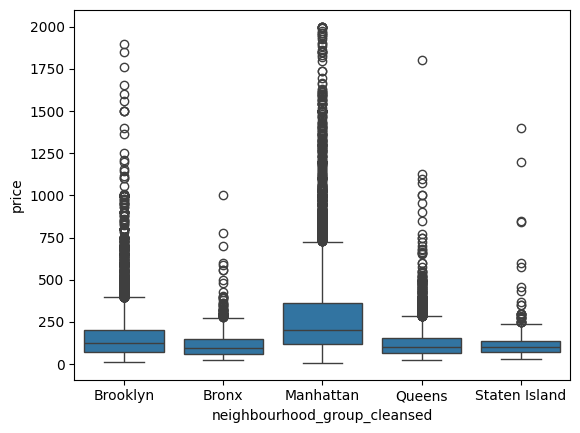

In [33]:
sns.boxplot(data=below_2k, x="neighbourhood_group_cleansed", y="price")

In [34]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### Preis und Room Type



In [35]:
below_2k.groupby("room_type").median(numeric_only=True)

,latitude,longitude,price,minimum_nights,maximum_nights
room_type,,,,,
Entire home/apt,40.729222,-73.964040,200.0,30.0,365.0
Hotel room,40.758604,-73.982685,308.0,1.0,1125.0
Private room,40.717170,-73.943860,84.0,30.0,365.0
Shared room,40.733880,-73.941870,60.0,30.0,365.0


<Axes: xlabel='latitude', ylabel='longitude'>

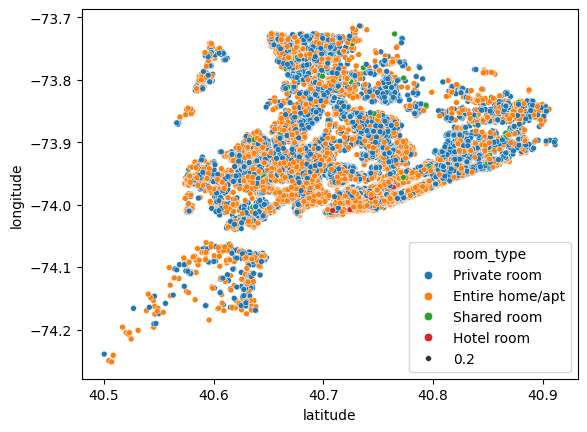

In [36]:
sns.scatterplot(below_2k, x="latitude", y="longitude",
                hue="room_type",  size=0.2)  # room_type

<Axes: xlabel='room_type', ylabel='price'>

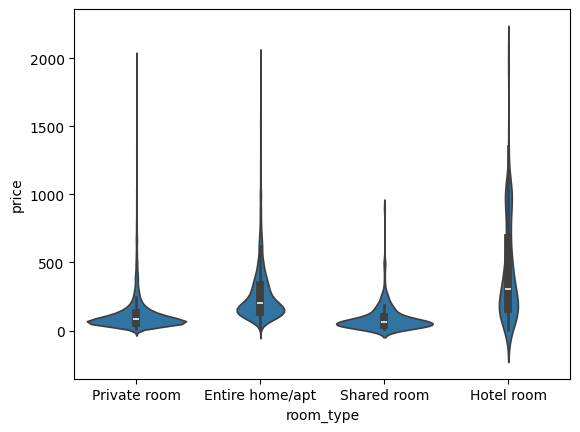

In [37]:
sns.violinplot(below_2k, x="room_type", y="price")

<Axes: xlabel='room_type', ylabel='price'>

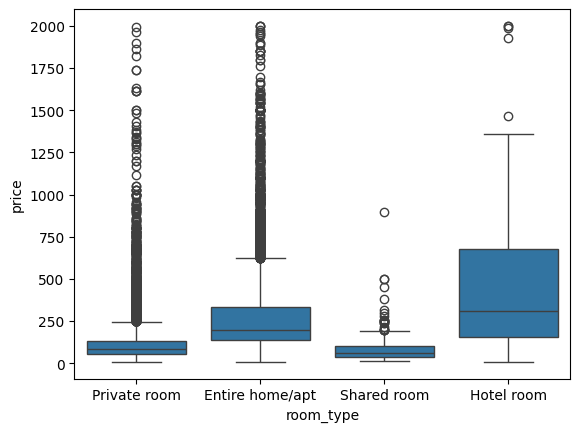

In [38]:
sns.boxplot(below_2k, x="room_type", y="price")

### Preis und Anzahl Nächte

In [39]:
below_2k["minimum_nights"].describe()

count    37444.000000
mean        29.000027
std         30.737775
min          1.000000
25%         30.000000
50%         30.000000
75%         30.000000
max       1250.000000
Name: minimum_nights, dtype: float64

(0.0, 10.0)

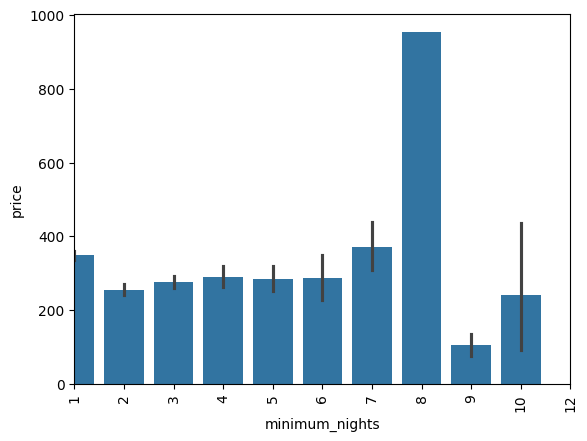

In [40]:
sns.barplot(below_2k, x="minimum_nights", y="price")
plt.xticks(rotation=90)
plt.xlim([0,10])

<Axes: xlabel='minimum_nights', ylabel='price'>

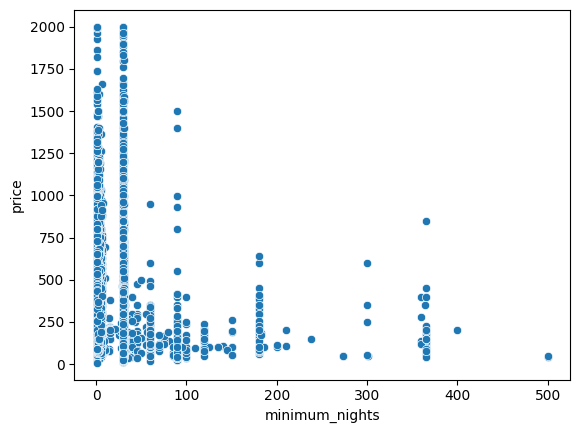

In [41]:
sns.scatterplot(below_2k, x="minimum_nights", y="price")

<Axes: xlabel='minimum_nights'>

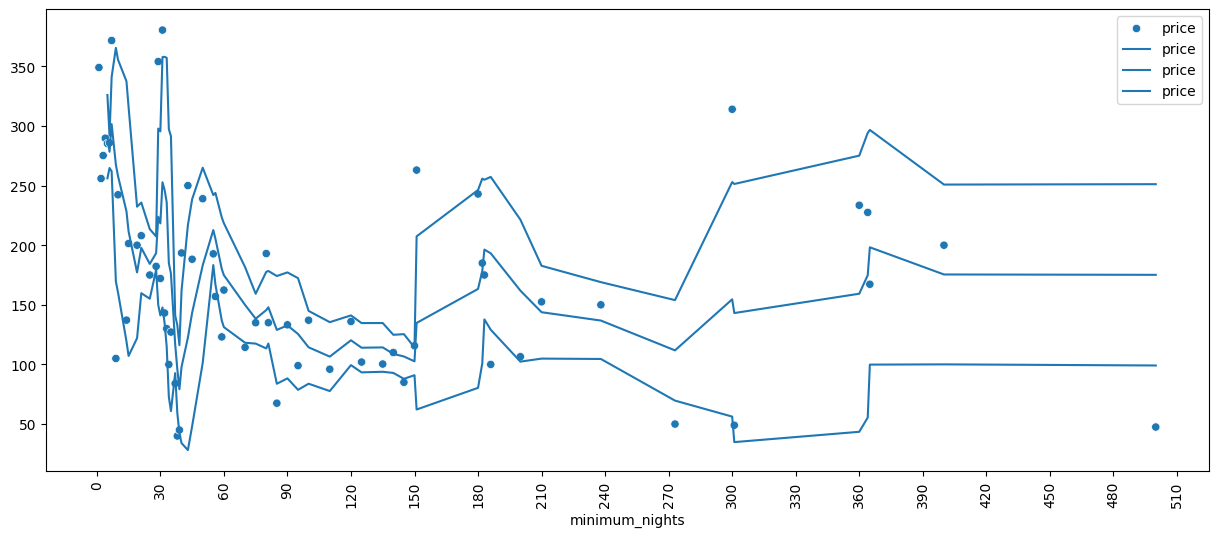

In [44]:

plt.figure(figsize=(15,6))

prices_per_night = below_2k[["minimum_nights", "price"]].groupby("minimum_nights").mean()
prices_per_night = prices_per_night[prices_per_night["price"] < 800]

plt.xticks(ticks=range(0, 511, 30), rotation=90)
sns.scatterplot(prices_per_night)

rolling_mean = prices_per_night.rolling(5).mean()
rolling_std = prices_per_night.rolling(5).std()

sns.lineplot(rolling_mean)
sns.lineplot(rolling_mean + rolling_std, color='orange')
sns.lineplot(rolling_mean - rolling_std, color='orange')

# plt.xticks(ticks=range(0, 511, 30), rotation=90)
# plt.show()

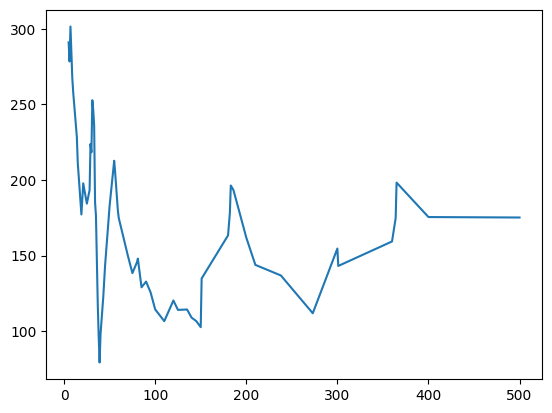

In [ ]:
plt.plot(prices_per_night.rolling(5).mean())
# plt.plot(prices_per_night.rolling(10).mean(), color="orange")
# plt.plot(prices_per_night.rolling(15).mean(), color="red")

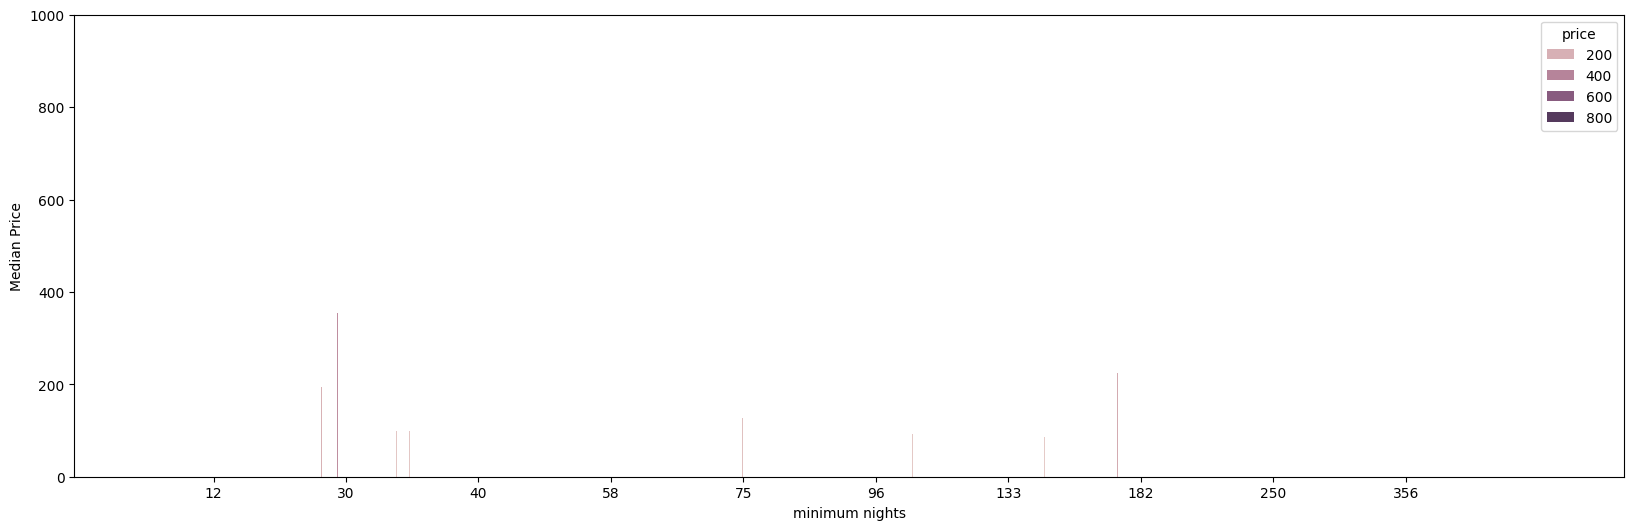

In [45]:
grouped = below_2k.groupby('minimum_nights')['price'].median().reset_index()
grouped = grouped.sort_values(by='price', ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(
    y='price', x='minimum_nights',
    hue='price',
    data=grouped,
    # palette= "Reds"
)
plt.ylabel("Median Price")
plt.xlabel("minimum nights")
plt.ylim(0, 1000)
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.show()